In [ ]:
import polars as pl
import pandas as pd


# 讀取 parquet
train_filled = pl.read_parquet("data/Try only companyID/train_filled.parquet")

In [ ]:
umap_features = [
    # --- 價格 + 行程資訊 ---
    "totalPrice", "legs0_duration", "legs1_duration", "total_num_transfers",
    'legs0_segments0_cabinClass', 'legs0_segments1_cabinClass',
    'legs0_segments2_cabinClass', 'legs0_segments3_cabinClass',
    'legs1_segments0_cabinClass', 'legs1_segments1_cabinClass',
    'legs1_segments2_cabinClass', 'legs1_segments3_cabinClass',
    "taxes", 'legs0_num_transfers', 'legs1_num_transfers',

    # --- 時間特徵 ---
    "legs0_departureAt_hour", "legs0_arrivalAt_hour",
    "legs1_departureAt_hour", "legs1_arrivalAt_hour",

    # --- 票務偏好 ---
    "free_cancel", "free_exchange", "miniRules0_percentage", "miniRules1_percentage",
    "has_baggage",
    "legs0_segments0_baggageAllowance_quantity", "legs0_segments1_baggageAllowance_quantity",
    "legs0_segments2_baggageAllowance_quantity", "legs0_segments3_baggageAllowance_quantity",
    "legs1_segments0_baggageAllowance_quantity", "legs1_segments1_baggageAllowance_quantity",
    "legs1_segments2_baggageAllowance_quantity", "legs1_segments3_baggageAllowance_quantity",
    "legs0_segments0_seatsAvailable", "legs0_segments1_seatsAvailable",
    "legs0_segments2_seatsAvailable", "legs0_segments3_seatsAvailable",
    "legs1_segments0_seatsAvailable", "legs1_segments1_seatsAvailable",
    "legs1_segments2_seatsAvailable", "legs1_segments3_seatsAvailable",

    # --- 出差情境 ---
    "pricingInfo_passengerCount", "is_round_trip",
    "days_before_departure", "days_between_departure_arrival",

    # --- 價格策略補充 ---
    "is_cheapest", "tax_rate", "has_fees", "total_fees", "legs0_duration_fastest", "legs1_duration_fastest", "total_duration_fastest"
]
meta_cols = ["companyID", "searchRoute"]

# 過濾 selected == 1，並只選擇你要的特徵
train_filled = train_filled.filter(pl.col("selected") == 1).select(umap_features + meta_cols)
train_filled.group_by(["companyID", "searchRoute"]).agg([
    pl.mean(c).alias(c) for c in umap_features
])

In [6]:
train_filled.group_by(["companyID", "searchRoute"]).agg([
    pl.mean(c).alias(c) for c in umap_features
])


shape: (25_708, 53)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ companyID ┆ searchRou ┆ totalPric ┆ legs0_dur ┆ … ┆ total_fee ┆ legs0_dur ┆ legs1_dur ┆ total_du │
│ ---       ┆ te        ┆ e         ┆ ation     ┆   ┆ s         ┆ ation_fas ┆ ation_fas ┆ ration_f │
│ i64       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ test      ┆ test      ┆ astest   │
│           ┆ i32       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 42620     ┆ 3025      ┆ 5649.0    ┆ 185.0     ┆ … ┆ 0.0       ┆ 0.0       ┆ 1.0       ┆ 0.0      │
│ 61031     ┆ 1420      ┆ 32850.0   ┆ 140.0     ┆ … ┆ 0.0       ┆ 1.0       ┆ 1.0       ┆ 1.0      │
│ 61295     ┆ 3951      ┆ 35957.0   ┆ 415.0     ┆ … ┆ 5600.0    ┆ 1.0       ┆ 0.0       ┆ 0.0      │
│ 43509     ┆ 4625      ┆ 30613.571 ┆ 161.42857 ┆ … ┆ 0.0       ┆ 0.0       ┆ 1.0       ┆ 0.0      │
│           ┆           ┆ 429       ┆ 1         ┆   ┆           ┆           ┆           ┆          │
│ 44518     ┆ 172       ┆ 42072.0   ┆ 315.0     ┆ … ┆ 9200.0    ┆ 1.0       ┆ 1.0       ┆ 1.0      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 58664     ┆ 3624      ┆ 8934.0    ┆ 85.0      ┆ … ┆ 5800.0    ┆ 1.0       ┆ 1.0       ┆ 1.0      │
│ 39052     ┆ 4578      ┆ 16467.5   ┆ 207.5     ┆ … ┆ 6666.6666 ┆ 0.666667  ┆ 0.833333  ┆ 0.5      │
│           ┆           ┆           ┆           ┆   ┆ 67        ┆           ┆           ┆          │
│ 63408     ┆ 3294      ┆ 10673.0   ┆ 105.0     ┆ … ┆ 5600.0    ┆ 1.0       ┆ 1.0       ┆ 1.0      │
│ 53367     ┆ 1848      ┆ 5015.0    ┆ 85.0      ┆ … ┆ 4000.0    ┆ 1.0       ┆ 1.0       ┆ 1.0      │
│ 56912     ┆ 4046      ┆ 17232.5   ┆ 95.0      ┆ … ┆ 4200.0    ┆ 0.5       ┆ 1.0       ┆ 0.5      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
import polars as pl
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.neighbors import NearestNeighbors
import numpy as np
import json
# 建立 composite key 當作唯一 ID
agg_df = train_filled.with_columns([
    (
        pl.col("companyID").cast(pl.Utf8) + "::" + pl.col("searchRoute").cast(pl.Utf8)
    ).alias("company_route_key")
])

# 準備 feature matrix
X = train_filled.select(umap_features).to_pandas().values
company_keys = agg_df.select("company_route_key").to_series().to_list()

# scale + umap
X_scaled = StandardScaler().fit_transform(X)
umap_model = UMAP(n_neighbors=15, n_components=5, metric="euclidean", random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 找最近公司
knn = NearestNeighbors(n_neighbors=11, metric="euclidean")
knn.fit(X_umap)
dists, indices = knn.kneighbors(X_umap)

# 建立對應表
nearest_map = {
    company_keys[i]: [company_keys[j] for j in indices[i][1:]]  # 排除自己
    for i in range(len(company_keys))
}

/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [67]:
import joblib

joblib.dump(umap_model, "data/nearest_neigbor/umap_only_train_model.pkl")

['data/nearest_neigbor/umap_only_train_model.pkl']

In [ ]:
# 準備 count lookup 表
count_df = (
    train_filled.group_by("company_route_key")
    .agg(pl.count().alias("count"))
    .to_pandas()
)
count_lookup = dict(zip(count_df["company_route_key"], count_df["count"]))

# 根據 count > 20 當作閾值來決定要使用哪些鄰居
refined_nearest_map = {}
for key, neighbors in nearest_map.items():
    total = 0
    selected_neighbors = []
    for neighbor in neighbors:
        cnt = count_lookup.get(neighbor, 0)
        total += cnt
        selected_neighbors.append(neighbor)
        if total >= 20:
            break
    refined_nearest_map[key] = selected_neighbors


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_71356/3676604752.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


In [65]:

for key, neighbors in list(refined_nearest_map.items())[:]:  # 只印前 20 個
    main_count = count_lookup.get(key, 0)
    neighbor_counts = [count_lookup.get(n, 0) for n in neighbors]
    print(f"{key} (main: {main_count}) → {neighbor_counts} (total: {sum(neighbor_counts)})")



57323::5118 (main: 1) → [3, 2, 3, 1, 4, 8] (total: 21)
57323::5178 (main: 2) → [7, 6, 1, 4, 8] (total: 26)
53407::3889 (main: 46) → [31] (total: 31)
59096::1352 (main: 4) → [4, 27] (total: 31)
62836::1726 (main: 10) → [4, 2, 35] (total: 41)
25312::1675 (main: 2) → [1, 1, 5, 3, 2, 3, 2, 3] (total: 20)
59096::958 (main: 14) → [2, 13, 13] (total: 28)
53407::1780 (main: 44) → [7, 293] (total: 300)
53407::1419 (main: 44) → [20] (total: 20)
59096::4017 (main: 25) → [49] (total: 49)
60734::936 (main: 7) → [5, 1, 5, 5, 9] (total: 25)
60734::651 (main: 5) → [3, 26] (total: 29)
60734::1254 (main: 1) → [3, 2, 3, 3, 85] (total: 96)
60734::656 (main: 1) → [2, 143] (total: 145)
42622::4046 (main: 12) → [23] (total: 23)
53367::2024 (main: 1) → [1, 3, 129] (total: 133)
60734::4012 (main: 14) → [2, 2, 23] (total: 27)
60734::705 (main: 14) → [31] (total: 31)
53317::5503 (main: 45) → [3, 3, 17] (total: 23)
53359::1816 (main: 1) → [1, 53] (total: 54)
60734::4017 (main: 18) → [18, 11] (total: 29)
43113::47

In [66]:
with open("data/nearest_neigbor/companyID_route_neighbors.json", "w") as f:
    json.dump(refined_nearest_map, f, indent=2, ensure_ascii=False)

print("✅ 已根據鄰居 count > 20 選出 refined nearest neighbors")


✅ 已根據鄰居 count > 20 選出 refined nearest neighbors


In [ ]:
count_lookup = {
    str(k): v for k, v in zip(count_df["company_route_key"], count_df["count"])
}

# 同理，refined_nearest_map 的 key 也都轉成 str 再查
key = str(key)
neighbor_counts = [count_lookup.get(str(n), 0) for n in neighbors]

for key, neighbors in list(refined_nearest_map.items())[:]:  # 只印前 20 個
    
    main_count = count_lookup.get(key, 0)
    neighbor_counts = [count_lookup.get(n, 0) for n in neighbors]
    print(f"{key} (main: {main_count}) → {neighbor_counts} (total: {sum(neighbor_counts)})")


57323::5118 (main: 1) → [3, 2, 3, 1, 4, 8, 2, 3, 1, 1] (total: 28)
57323::5178 (main: 2) → [7, 6, 1, 4, 8, 6] (total: 32)
53407::3889 (main: 0) → [0, 0, 0, 0, 1, 0, 0, 0, 2, 4] (total: 7)
59096::1352 (main: 4) → [4, 0, 1, 1, 0, 0, 1, 0, 1, 0] (total: 8)
62836::1726 (main: 10) → [4, 2, 0, 1, 0, 0, 0, 1, 0, 0] (total: 8)
25312::1675 (main: 2) → [1, 1, 5, 3, 2, 3, 2, 3, 1, 1] (total: 22)
59096::958 (main: 14) → [2, 13, 13, 13] (total: 41)
53407::1780 (main: 0) → [7, 0, 0, 9, 6, 6, 0, 6] (total: 34)
53407::1419 (main: 0) → [0, 17, 3, 0, 4, 0, 17] (total: 41)
59096::4017 (main: 0) → [0, 4, 11, 4, 5, 0, 1, 0, 0, 0] (total: 25)
60734::936 (main: 7) → [5, 1, 5, 5, 9, 9] (total: 34)
60734::651 (main: 5) → [3, 0, 0, 0, 1, 1, 1, 1, 2, 2] (total: 11)
60734::1254 (main: 1) → [3, 2, 3, 3, 0, 3, 11, 11] (total: 36)
60734::656 (main: 1) → [2, 0, 16, 0, 4, 0, 4, 1, 0, 2] (total: 29)
42622::4046 (main: 12) → [0, 0, 2, 3, 6, 2, 3, 0, 19] (total: 35)
53367::2024 (main: 1) → [1, 3, 0, 2, 4, 1, 0, 1, 0, 0] 

In [84]:
test_filled = pl.read_parquet("data/Try only companyID/test_filled.parquet")

In [ ]:
umap_features = [
    # --- 價格 + 行程資訊 ---
    "totalPrice", "legs0_duration", "legs1_duration", "total_num_transfers",
    'legs0_segments0_cabinClass', 'legs0_segments1_cabinClass',
    'legs0_segments2_cabinClass', 'legs0_segments3_cabinClass',
    'legs1_segments0_cabinClass', 'legs1_segments1_cabinClass',
    'legs1_segments2_cabinClass', 'legs1_segments3_cabinClass',
    "taxes", 'legs0_num_transfers', 'legs1_num_transfers',

    # --- 時間特徵 ---
    "legs0_departureAt_hour", "legs0_arrivalAt_hour",
    "legs1_departureAt_hour", "legs1_arrivalAt_hour",

    # --- 票務偏好 ---
    "free_cancel", "free_exchange", "miniRules0_percentage", "miniRules1_percentage",
    "has_baggage",
    "legs0_segments0_baggageAllowance_quantity", "legs0_segments1_baggageAllowance_quantity",
    "legs0_segments2_baggageAllowance_quantity", "legs0_segments3_baggageAllowance_quantity",
    "legs1_segments0_baggageAllowance_quantity", "legs1_segments1_baggageAllowance_quantity",
    "legs1_segments2_baggageAllowance_quantity", "legs1_segments3_baggageAllowance_quantity",
    "legs0_segments0_seatsAvailable", "legs0_segments1_seatsAvailable",
    "legs0_segments2_seatsAvailable", "legs0_segments3_seatsAvailable",
    "legs1_segments0_seatsAvailable", "legs1_segments1_seatsAvailable",
    "legs1_segments2_seatsAvailable", "legs1_segments3_seatsAvailable",

    # --- 出差情境 ---
    "pricingInfo_passengerCount", "is_round_trip",
    "days_before_departure", "days_between_departure_arrival",

    # --- 價格策略補充 ---
    "is_cheapest", "tax_rate", "has_fees", "total_fees", "legs0_duration_fastest", "legs1_duration_fastest", "total_duration_fastest"
]
meta_cols = ["companyID", "searchRoute", "ranker_id"]

# 過濾 selected == 1，並只選擇你要的特徵
test_filled = test_filled.select(umap_features + meta_cols)

test_filled = test_filled.with_columns([
    (
        pl.col("companyID").cast(pl.Utf8) + "::" + pl.col("searchRoute").cast(pl.Utf8)
    ).alias("company_route_key")
])


In [ ]:


# 找出 test 中有、train 中沒有的 company_route_key
unique_train_keys = train_filled.select("company_route_key").unique()

unseen_company_keys = test_filled.filter(
    ~pl.col("company_route_key").is_in(unique_train_keys["company_route_key"])
)

# 如果你只想看 key：
unseen_keys = unseen_company_keys.select("company_route_key").unique()


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_71356/3503120146.py:4: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  unseen_company_keys = test_filled.filter(


In [106]:
train_filled.filter(train_filled["company_route_key"]== "61627::1356")

shape: (0, 54)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ totalPric ┆ legs0_dur ┆ legs1_dur ┆ total_num ┆ … ┆ total_dur ┆ companyID ┆ searchRou ┆ company_ │
│ e         ┆ ation     ┆ ation     ┆ _transfer ┆   ┆ ation_fas ┆ ---       ┆ te        ┆ route_ke │
│ ---       ┆ ---       ┆ ---       ┆ s         ┆   ┆ test      ┆ i64       ┆ ---       ┆ y        │
│ f64       ┆ i64       ┆ i64       ┆ ---       ┆   ┆ ---       ┆           ┆ i32       ┆ ---      │
│           ┆           ┆           ┆ i8        ┆   ┆ i8        ┆           ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [102]:
unseen_keys

shape: (5_273, 1)
┌───────────────────┐
│ company_route_key │
│ ---               │
│ str               │
╞═══════════════════╡
│ 61627::1356       │
│ 42174::84         │
│ 27937::5218       │
│ 59615::3110       │
│ 25312::1298       │
│ …                 │
│ 60882::900        │
│ 63034::1738       │
│ 41609::1395       │
│ 44500::530        │
│ 61081::705        │
└───────────────────┘

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from umap import UMAP
import numpy as np

# --- Step 1: Filter unseen company_route_keys ---
unseen_keys_list = unseen_keys["company_route_key"].to_list()

# --- Step 2: group mean of test_filled where company_route_key is unseen ---
test_unseen_agg = (
    test_filled
    .filter(pl.col("company_route_key").is_in(unseen_keys_list))
    .group_by("company_route_key")
    .agg([pl.mean(col).alias(col) for col in umap_features if col in test_filled.columns])
)

# --- Step 3: Convert to NumPy for scaler ---
X_test = test_unseen_agg.select(umap_features).to_pandas().values
X_train = train_filled.select(umap_features).to_pandas().values

# --- Step 4: Fit scaler and transform both ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 5: Fit UMAP ---
# umap_model = UMAP(n_neighbors=15, n_components=5, metric="euclidean", random_state=42)
# X_train_umap = umap_model.fit_transform(X_train_scaled)
import joblib

# --- 載入已訓練好的 UMAP 模型 ---
umap_model = joblib.load("data/nearest_neigbor/umap_only_train_model.pkl")
X_train_umap = umap_model.transform(X_train_scaled)

# --- 直接 transform test set ---
X_test_umap = umap_model.transform(X_test_scaled)

# Step 3: Concatenate UMAP embeddings
X_all_umap = np.concatenate([X_train_umap, X_test_umap], axis=0)

# Step 4: Fit NearestNeighbors on ALL data
nn_model = NearestNeighbors(n_neighbors=11, metric="euclidean")
nn_model.fit(X_all_umap)

# Step 5: Query only test part
n_train = X_train_umap.shape[0]
distances, indices = nn_model.kneighbors(X_all_umap[n_train:])

# Step 6: Build combined company keys list
train_company_keys = train_filled.select("companyID", "searchRoute").with_columns([
    (pl.col("companyID").cast(pl.Utf8) + "::" + pl.col("searchRoute").cast(pl.Utf8)).alias("company_route_key")
])["company_route_key"].to_list()

test_company_keys = test_unseen_agg["company_route_key"].to_list()
all_company_keys = train_company_keys + test_company_keys

# Step 7: Build result dict
nearest_dict = {
    test_company_keys[i]: [all_company_keys[idx] for idx in indices[i]]
    for i in range(len(test_company_keys))
}

In [19]:
train_filled.filter(train_filled["company_route_key"]== "57323::1957")

shape: (2, 54)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ totalPric ┆ legs0_dur ┆ legs1_dur ┆ total_num ┆ … ┆ total_dur ┆ companyID ┆ searchRou ┆ company_ │
│ e         ┆ ation     ┆ ation     ┆ _transfer ┆   ┆ ation_fas ┆ ---       ┆ te        ┆ route_ke │
│ ---       ┆ ---       ┆ ---       ┆ s         ┆   ┆ test      ┆ i64       ┆ ---       ┆ y        │
│ f64       ┆ i64       ┆ i64       ┆ ---       ┆   ┆ ---       ┆           ┆ i32       ┆ ---      │
│           ┆           ┆           ┆ i8        ┆   ┆ i8        ┆           ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 30391.0   ┆ 495       ┆ 630       ┆ 2         ┆ … ┆ 0         ┆ 57323     ┆ 1957      ┆ 57323::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 957      │
│ 40716.0   ┆ 495       ┆ 420       ┆ 2         ┆ … ┆ 0         ┆ 57323     ┆ 1957      ┆ 57323::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 957      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [20]:
train_filled.filter(train_filled["searchRoute"]== "1356")

shape: (10, 54)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ totalPric ┆ legs0_dur ┆ legs1_dur ┆ total_num ┆ … ┆ total_dur ┆ companyID ┆ searchRou ┆ company_ │
│ e         ┆ ation     ┆ ation     ┆ _transfer ┆   ┆ ation_fas ┆ ---       ┆ te        ┆ route_ke │
│ ---       ┆ ---       ┆ ---       ┆ s         ┆   ┆ test      ┆ i64       ┆ ---       ┆ y        │
│ f64       ┆ i64       ┆ i64       ┆ ---       ┆   ┆ ---       ┆           ┆ i32       ┆ ---      │
│           ┆           ┆           ┆ i8        ┆   ┆ i8        ┆           ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 29907.0   ┆ 435       ┆ 750       ┆ 2         ┆ … ┆ 0         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 28967.0   ┆ 435       ┆ 925       ┆ 2         ┆ … ┆ 0         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 28967.0   ┆ 435       ┆ 925       ┆ 2         ┆ … ┆ 0         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 28967.0   ┆ 435       ┆ 925       ┆ 2         ┆ … ┆ 0         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 30922.0   ┆ 435       ┆ 575       ┆ 2         ┆ … ┆ 1         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 30922.0   ┆ 435       ┆ 575       ┆ 2         ┆ … ┆ 1         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 27457.0   ┆ 435       ┆ 575       ┆ 2         ┆ … ┆ 1         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 27457.0   ┆ 435       ┆ 575       ┆ 2         ┆ … ┆ 1         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 27457.0   ┆ 435       ┆ 575       ┆ 2         ┆ … ┆ 1         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 29717.0   ┆ 435       ┆ 750       ┆ 2         ┆ … ┆ 0         ┆ 42620     ┆ 1356      ┆ 42620::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [17]:
test_filled.filter(test_filled["company_route_key"]== "61627::1356")

shape: (42, 54)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ totalPric ┆ legs0_dur ┆ legs1_dur ┆ total_num ┆ … ┆ total_dur ┆ companyID ┆ searchRou ┆ company_ │
│ e         ┆ ation     ┆ ation     ┆ _transfer ┆   ┆ ation_fas ┆ ---       ┆ te        ┆ route_ke │
│ ---       ┆ ---       ┆ ---       ┆ s         ┆   ┆ test      ┆ i64       ┆ ---       ┆ y        │
│ f64       ┆ i64       ┆ i64       ┆ ---       ┆   ┆ ---       ┆           ┆ i32       ┆ ---      │
│           ┆           ┆           ┆ i8        ┆   ┆ i8        ┆           ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 23070.0   ┆ 530       ┆ 605       ┆ 2         ┆ … ┆ 0         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 30340.0   ┆ 530       ┆ 605       ┆ 2         ┆ … ┆ 0         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 61955.0   ┆ 530       ┆ 605       ┆ 2         ┆ … ┆ 0         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 25770.0   ┆ 385       ┆ 605       ┆ 2         ┆ … ┆ 1         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 33370.0   ┆ 385       ┆ 605       ┆ 2         ┆ … ┆ 1         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 95229.0   ┆ 1355      ┆ 1390      ┆ 2         ┆ … ┆ 0         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 148484.0  ┆ 1355      ┆ 1390      ┆ 2         ┆ … ┆ 0         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 78974.0   ┆ 1250      ┆ 1390      ┆ 2         ┆ … ┆ 0         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 104409.0  ┆ 1250      ┆ 1390      ┆ 2         ┆ … ┆ 0         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
│ 159924.0  ┆ 1250      ┆ 1390      ┆ 2         ┆ … ┆ 0         ┆ 61627     ┆ 1356      ┆ 61627::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 356      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [110]:
for key in unseen_keys_list:
    neighbors = [n for n in nearest_dict.get(key, []) if n != key]
    print(f"\n🔎 {key} 的鄰居（排除自己）:")
    for i, neighbor in enumerate(neighbors, 1):
        print(f"  {i:>2}. {neighbor}")



🔎 61627::1356 的鄰居（排除自己）:
   1. 57323::1957
   2. 57323::2234
   3. 57323::4497
   4. 57323::1957
   5. 57323::4497
   6. 42160::5177
   7. 57323::2012
   8. 62212::1360
   9. 62836::3407
  10. 57323::4497

🔎 42174::84 的鄰居（排除自己）:
   1. 61654::2160
   2. 59177::1641
   3. 53926::1641
   4. 54936::5018
   5. 27507::40
   6. 62212::70
   7. 27507::70
   8. 56901::2826
   9. 36948::2826
  10. 36948::2826

🔎 27937::5218 的鄰居（排除自己）:
   1. 20723::1617
   2. 61063::2221
   3. 62752::3556
   4. 58664::3901
   5. 27507::2021
   6. 57323::5340
   7. 56912::5321
   8. 56912::5321
   9. 56912::5321
  10. 53359::5266

🔎 59615::3110 的鄰居（排除自己）:
   1. 53643::3057
   2. 42620::1993
   3. 58664::3223
   4. 51307::3223
   5. 36948::3150
   6. 42620::1993
   7. 56912::1929
   8. 42620::1993
   9. 19419::3724
  10. 59766::3101

🔎 25312::1298 的鄰居（排除自己）:
   1. 25312::4550
   2. 53367::1791
   3. 25312::116
   4. 25312::4168
   5. 25312::1263
   6. 25312::40
   7. 41022::4456
   8. 42174::5183
   9. 25312::70
 

# train  + test umap

In [ ]:
import polars as pl
import pandas as pd


# 讀取 parquet
train_filled = pl.read_parquet("data/Try only companyID/train_filled.parquet")
umap_features = [
    # --- 價格 + 行程資訊 ---
    "totalPrice", "legs0_duration", "legs1_duration", "total_num_transfers",
    'legs0_segments0_cabinClass', 'legs0_segments1_cabinClass',
    'legs0_segments2_cabinClass', 'legs0_segments3_cabinClass',
    'legs1_segments0_cabinClass', 'legs1_segments1_cabinClass',
    'legs1_segments2_cabinClass', 'legs1_segments3_cabinClass',
    "taxes", 'legs0_num_transfers', 'legs1_num_transfers',

    # --- 時間特徵 ---
    "legs0_departureAt_hour", "legs0_arrivalAt_hour",
    "legs1_departureAt_hour", "legs1_arrivalAt_hour",

    # --- 票務偏好 ---
    "free_cancel", "free_exchange", "miniRules0_percentage", "miniRules1_percentage",
    "has_baggage",
    "legs0_segments0_baggageAllowance_quantity", "legs0_segments1_baggageAllowance_quantity",
    "legs0_segments2_baggageAllowance_quantity", "legs0_segments3_baggageAllowance_quantity",
    "legs1_segments0_baggageAllowance_quantity", "legs1_segments1_baggageAllowance_quantity",
    "legs1_segments2_baggageAllowance_quantity", "legs1_segments3_baggageAllowance_quantity",
    "legs0_segments0_seatsAvailable", "legs0_segments1_seatsAvailable",
    "legs0_segments2_seatsAvailable", "legs0_segments3_seatsAvailable",
    "legs1_segments0_seatsAvailable", "legs1_segments1_seatsAvailable",
    "legs1_segments2_seatsAvailable", "legs1_segments3_seatsAvailable",

    # --- 出差情境 ---
    "pricingInfo_passengerCount", "is_round_trip",
    "days_before_departure", "days_between_departure_arrival",

    # --- 價格策略補充 ---
    "is_cheapest", "tax_rate", "has_fees", "total_fees", "legs0_duration_fastest", "legs1_duration_fastest", "total_duration_fastest"
]
meta_cols = ["companyID", "searchRoute"]

# 過濾 selected == 1，並只選擇你要的特徵
train_filled = train_filled.select(umap_features + meta_cols)
train_filled = train_filled.group_by(["companyID"]).agg([
    pl.mean(c).alias(c) for c in umap_features
])

# train_filled = train_filled.with_columns([
#     (
#         pl.col("companyID").cast(pl.Utf8) + "::" + pl.col("searchRoute").cast(pl.Utf8)
#     ).alias("company_route_key")
# ])

shape: (641, 52)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ companyID ┆ totalPric ┆ legs0_dur ┆ legs1_dur ┆ … ┆ total_fee ┆ legs0_dur ┆ legs1_dur ┆ total_du │
│ ---       ┆ e         ┆ ation     ┆ ation     ┆   ┆ s         ┆ ation_fas ┆ ation_fas ┆ ration_f │
│ i64       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ test      ┆ test      ┆ astest   │
│           ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 62666     ┆ 44246.244 ┆ 137.94171 ┆ 115.97449 ┆ … ┆ 2740.6193 ┆ 0.034608  ┆ 0.125683  ┆ 0.005464 │
│           ┆ 08        ┆ 2         ┆ 9         ┆   ┆ 08        ┆           ┆           ┆          │
│ 28222     ┆ 46908.662 ┆ 192.66007 ┆ 177.10128 ┆ … ┆ 2444.7031 ┆ 0.261932  ┆ 0.885914  ┆ 0.227008 │
│           ┆ 398       ┆           ┆ 1         ┆   ┆ 43        ┆           ┆           ┆          │
│ 51287     ┆ 21738.471 ┆ 204.37847 ┆ 191.49250 ┆ … ┆ 2657.8073 ┆ 0.093884  ┆ 0.228143  ┆ 0.041329 │
│           ┆ 62        ┆           ┆ 4         ┆   ┆ 41        ┆           ┆           ┆          │
│ 60323     ┆ 26209.197 ┆ 107.20485 ┆ 1.872826  ┆ … ┆ 2759.6869 ┆ 0.02292   ┆ 0.992955  ┆ 0.022385 │
│           ┆ 449       ┆ 2         ┆           ┆   ┆ 7         ┆           ┆           ┆          │
│ 63068     ┆ 181171.21 ┆ 492.79619 ┆ 94.747619 ┆ … ┆ 8647.7809 ┆ 0.142857  ┆ 0.74381   ┆ 0.127619 │
│           ┆ 4286      ┆           ┆           ┆   ┆ 52        ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 26870     ┆ 314342.01 ┆ 370.53970 ┆ 202.22704 ┆ … ┆ 10441.048 ┆ 0.150124  ┆ 0.681141  ┆ 0.111663 │
│           ┆ 2407      ┆ 2         ┆ 7         ┆   ┆ 387       ┆           ┆           ┆          │
│ 54109     ┆ 215165.01 ┆ 509.14705 ┆ 498.73529 ┆ … ┆ 9704.7058 ┆ 0.023529  ┆ 0.064706  ┆ 0.023529 │
│           ┆ 7647      ┆ 9         ┆ 4         ┆   ┆ 82        ┆           ┆           ┆          │
│ 61990     ┆ 21181.256 ┆ 143.66245 ┆ 124.56362 ┆ … ┆ 2995.3593 ┆ 0.113678  ┆ 0.039421  ┆ 0.007334 │
│           ┆ 876       ┆           ┆ 3         ┆   ┆ 69        ┆           ┆           ┆          │
│ 46526     ┆ 22172.688 ┆ 115.73475 ┆ 28.119243 ┆ … ┆ 2623.5390 ┆ 0.038777  ┆ 0.772693  ┆ 0.03783  │
│           ┆ 513       ┆ 3         ┆           ┆   ┆ 5         ┆           ┆           ┆          │
│ 54642     ┆ 94002.756 ┆ 478.11645 ┆ 453.21840 ┆ … ┆ 6013.3577 ┆ 0.081302  ┆ 0.170776  ┆ 0.026561 │
│           ┆ 728       ┆ 8         ┆ 2         ┆   ┆ 57        ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [4]:
test_filled = pl.read_parquet("data/Try only companyID/test_filled.parquet")
# 過濾 selected == 1，並只選擇你要的特徵
test_filled = test_filled.select(umap_features + meta_cols)

# test_filled = test_filled.with_columns([
#     (
#         pl.col("companyID").cast(pl.Utf8) + "::" + pl.col("searchRoute").cast(pl.Utf8)
#     ).alias("company_route_key")
# ])
test_filled = test_filled.group_by(["companyID"]).agg([
    pl.mean(c).alias(c) for c in umap_features
])

In [5]:
# 找出 test 中有、train 中沒有的 company_route_key
unique_train_keys = train_filled.select("companyID").unique()

unseen_company_keys = test_filled.filter(
    ~pl.col("companyID").is_in(unique_train_keys["companyID"])
)

# 如果你只想看 key：
unseen_keys = unseen_company_keys.select("companyID").unique()

# --- Step 1: Filter unseen company_route_keys ---
unseen_keys_list = unseen_keys["companyID"].to_list()

# --- Step 2: group mean of test_filled where company_route_key is unseen ---
test_unseen_agg = (
    test_filled
    .filter(pl.col("companyID").is_in(unseen_keys_list))
    .group_by("companyID")
    .agg([pl.mean(col).alias(col) for col in umap_features if col in test_filled.columns])
)


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_92591/1511489573.py:4: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  unseen_company_keys = test_filled.filter(


In [ ]:
train_filled.filter(train_filled["company_route_key"]== "61627::1356")

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from umap import UMAP
import numpy as np
X_all = np.concatenate([train_filled[umap_features], test_unseen_agg[umap_features]], axis=0)
# Step 4: 合併並轉 numpy
train_keys = train_filled.select("companyID")

test_keys = test_unseen_agg.select("companyID")


company_keys = train_keys.to_series().to_list() + test_keys.to_series().to_list()

# Step 5: 標準化
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# Step 6: UMAP
umap_model = UMAP(n_neighbors=15, n_components=5, metric="euclidean", random_state=42)
X_all_umap = umap_model.fit_transform(X_all_scaled)

# Step 7: Nearest Neighbors，找除了自己以外的 top-10
nn_model = NearestNeighbors(n_neighbors=21, metric="euclidean")  # 11: 包含自己
nn_model.fit(X_all_umap)
distances, indices = nn_model.kneighbors(X_all_umap)

# Step 8: 建立 dict 並排除自己 (索引0)
nearest_dict_no_self = {
    company_keys[i]: [company_keys[idx] for idx in indices[i] if idx != i][:20]
    for i in range(len(company_keys))
}


/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [68]:
nearest_dict_no_self

{60716: [45049,
  58203,
  36998,
  53999,
  63359,
  43816,
  42702,
  62844,
  63016,
  47451,
  58309,
  27753,
  53548,
  59824,
  36948,
  63329,
  62918,
  54154,
  62981,
  54218],
 42620: [60390,
  62537,
  58666,
  53544,
  46862,
  62836,
  16951,
  62853,
  60969,
  62632,
  43951,
  54218,
  45761,
  54411,
  16636,
  63016,
  62844,
  54677,
  52573,
  58676],
 63461: [59475,
  62273,
  61200,
  59818,
  62029,
  63196,
  59457,
  54575,
  62904,
  56949,
  44071,
  61177,
  53586,
  56951,
  59469,
  57922,
  59481,
  54414,
  28277,
  42174],
 54175: [53317,
  54174,
  53359,
  62752,
  53407,
  62795,
  62244,
  54869,
  61627,
  57323,
  44132,
  57892,
  49488,
  63237,
  53405,
  53365,
  51239,
  59596,
  62212,
  38955],
 16950: [60558,
  43111,
  54679,
  63004,
  62344,
  61216,
  54163,
  43151,
  60923,
  26817,
  59096,
  19419,
  60406,
  63420,
  52489,
  63323,
  54437,
  42415,
  61654,
  61243],
 54705: [54294,
  54169,
  54257,
  41313,
  59070,
  54709,

In [71]:
for key in unseen_keys_list:
    neighbors = [n for n in nearest_dict_no_self.get(key, []) if n != key]
    print(f"\n🔎 {key} 的鄰居（排除自己）:")
    for i, neighbor in enumerate(neighbors, 1):
        print(f"  {i:>2}. {neighbor}")



🔎 63196 的鄰居（排除自己）:
   1. 59457
   2. 61200
   3. 63461
   4. 56949
   5. 56951
   6. 59475
   7. 59469
   8. 61177
   9. 44071
  10. 53586
  11. 59818
  12. 62273
  13. 62904
  14. 28277
  15. 62029
  16. 57922
  17. 54575
  18. 58363
  19. 61027
  20. 54414

🔎 59487 的鄰居（排除自己）:
   1. 58395
   2. 61822
   3. 61607
   4. 59277
   5. 47350
   6. 62441
   7. 43019
   8. 63231
   9. 47405
  10. 57311
  11. 26387
  12. 51287
  13. 47453
  14. 60691
  15. 40069
  16. 28235
  17. 27336
  18. 61818
  19. 26389
  20. 26386

🔎 59818 的鄰居（排除自己）:
   1. 54575
   2. 57922
   3. 61177
   4. 59469
   5. 63461
   6. 59457
   7. 54414
   8. 28277
   9. 61200
  10. 62029
  11. 59475
  12. 62273
  13. 63196
  14. 61027
  15. 58363
  16. 60794
  17. 60754
  18. 44071
  19. 59467
  20. 63396

🔎 61751 的鄰居（排除自己）:
   1. 61874
   2. 60834
   3. 54273
   4. 56715
   5. 59926
   6. 44118
   7. 27637
   8. 27929
   9. 27812
  10. 42188
  11. 61641
  12. 59653
  13. 43464
  14. 61041
  15. 54495
  16. 62777
  17. 27

In [73]:
# 選擇要排除自己 or 不排除
neighbors_dict = {
    key: [n for n in nearest_dict_no_self.get(key, []) if n != key]
    for key in unseen_keys_list
}

import json

with open("data/nearest_neigbor/unseen_neighbors_companyID.json", "w") as f:
    json.dump(neighbors_dict, f, indent=2)


In [56]:
train_agg = pl.read_parquet("data/Try only companyID/train_filled.parquet")
# 過濾 selected == 1，並只選擇你要的特徵
train_agg = train_agg.select(umap_features + meta_cols + ['ranker_id'])

# test_filled = test_filled.with_columns([
#     (
#         pl.col("companyID").cast(pl.Utf8) + "::" + pl.col("searchRoute").cast(pl.Utf8)
#     ).alias("company_route_key")
# ])
train_agg = train_agg.group_by(["ranker_id",'companyID', 'searchRoute']).agg([
    pl.mean(c).alias(c) for c in umap_features
])


In [52]:
test_agg = pl.read_parquet("data/Try only companyID/test_filled.parquet")
# 過濾 selected == 1，並只選擇你要的特徵
test_agg = test_agg.select(umap_features + meta_cols+ ['ranker_id'])

# test_filled = test_filled.with_columns([
#     (
#         pl.col("companyID").cast(pl.Utf8) + "::" + pl.col("searchRoute").cast(pl.Utf8)
#     ).alias("company_route_key")
# ])


In [57]:
X_agg = pl.concat([train_agg, test_agg], how="vertical")


In [74]:

count_df = (
    train_agg.group_by("companyID")
    .agg(pl.count().alias("count"))
    .to_pandas()
)
count_lookup = dict(zip(count_df["companyID"], count_df["count"]))

# 根據 count > 20 當作閾值來決定要使用哪些鄰居
refined_nearest_map = {}
for key, neighbors in neighbors_dict.items():
    total = 0
    selected_neighbors = []
    for neighbor in neighbors:
        cnt = count_lookup.get(neighbor, 0)
        total += cnt
        selected_neighbors.append(neighbor)
        if total >= 20:
            break
    refined_nearest_map[key] = selected_neighbors

for key, neighbors in list(refined_nearest_map.items())[:]:  # 只印前 20 個
    main_count = count_lookup.get(key, 0)
    neighbor_counts = [count_lookup.get(n, 0) for n in neighbors]
    print(f"{key} (main: {main_count}) → {neighbor_counts} (total: {sum(neighbor_counts)})")



63196 (main: 0) → [1, 3, 27] (total: 31)
59487 (main: 0) → [2, 0, 0, 0, 1, 1, 0, 3, 1, 1, 81] (total: 90)
59818 (main: 0) → [3, 15, 2] (total: 20)
61751 (main: 0) → [0, 1, 35] (total: 36)
62098 (main: 0) → [0, 13, 7] (total: 20)
59070 (main: 0) → [6, 5, 33] (total: 44)
63243 (main: 0) → [2, 1, 0, 1, 42] (total: 46)
62020 (main: 0) → [14, 59] (total: 73)
62871 (main: 0) → [6, 1, 49] (total: 56)
61818 (main: 0) → [17, 1, 0, 1, 1] (total: 20)
61654 (main: 0) → [104] (total: 104)
61874 (main: 0) → [0, 1, 35] (total: 36)
16880 (main: 0) → [1, 59] (total: 60)
61822 (main: 0) → [3, 222] (total: 225)
62368 (main: 0) → [1, 3, 9, 12] (total: 25)
59090 (main: 0) → [0, 17, 6] (total: 23)
62459 (main: 0) → [16, 3, 5] (total: 24)
59277 (main: 0) → [81] (total: 81)
62463 (main: 0) → [5, 2, 1, 10, 8] (total: 26)
60219 (main: 0) → [2, 2, 26] (total: 30)
62794 (main: 0) → [15, 23] (total: 38)
60288 (main: 0) → [1, 2, 1, 29] (total: 33)
43019 (main: 0) → [1, 1, 1, 17] (total: 20)
62029 (main: 0) → [23] (

/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_92591/2640485306.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


In [ ]:
refined_nearest_map

{63196: [59457, 61200, 63461],
 59487: [58395,
  61822,
  61607,
  59277,
  47350,
  62441,
  43019,
  63231,
  47405,
  57311,
  26387],
 59818: [54575, 57922, 61177],
 61751: [61874, 60834, 54273],
 62098: [45683, 62134, 51331],
 59070: [54257, 54169, 54294],
 63243: [61836, 62452, 61724, 62105, 54402],
 62020: [58365, 60545],
 62871: [58137, 60771, 53598],
 61818: [28235, 40069, 59090, 47405, 47350],
 61654: [63420],
 61874: [61751, 60834, 54273],
 16880: [62052, 63273],
 61822: [63231, 51287],
 62368: [60241, 58356, 62024, 24217],
 59090: [61818, 28235, 28222],
 62459: [62279, 62409, 58059],
 59277: [26387],
 62463: [60657, 51446, 28348, 45774, 27153],
 60219: [57260, 25691, 57734],
 62794: [57869, 60136],
 60288: [62340, 54439, 63362, 59847],
 43019: [47350, 47405, 40069, 28235],
 62029: [62273],
 62110: [60555, 27094],
 61579: [60410, 63332],
 60838: [62382, 61173, 61129, 61090, 61214, 61169, 61147, 58261, 54665, 59197],
 61627: [44132, 51239, 62795],
 61641: [60834, 62441, 61751

: 

In [75]:
import json

with open("data/nearest_neigbor/unseen_neighbors_companyID.json", "w") as f:
    json.dump(refined_nearest_map, f, indent=2)

# 

In [ ]:
import polars as pl
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.neighbors import NearestNeighbors
import numpy as np
import json
# 建立 composite key 當作唯一 ID


# 準備 feature matrix
X = train_filled.select(umap_features).to_pandas().values
company_keys = agg_df.select("company_route_key").to_series().to_list()

# scale + umap
X_scaled = StandardScaler().fit_transform(X)
umap_model = UMAP(n_neighbors=15, n_components=5, metric="euclidean", random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 找最近公司
knn = NearestNeighbors(n_neighbors=11, metric="euclidean")
knn.fit(X_umap)
dists, indices = knn.kneighbors(X_umap)

# 建立對應表
nearest_map = {
    company_keys[i]: [company_keys[j] for j in indices[i][1:]]  # 排除自己
    for i in range(len(company_keys))
}

shape: (105_539, 53)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ totalPric ┆ legs0_dur ┆ legs1_dur ┆ total_num ┆ … ┆ legs1_dur ┆ total_dur ┆ companyID ┆ searchRo │
│ e         ┆ ation     ┆ ation     ┆ _transfer ┆   ┆ ation_fas ┆ ation_fas ┆ ---       ┆ ute      │
│ ---       ┆ ---       ┆ ---       ┆ s         ┆   ┆ test      ┆ test      ┆ i64       ┆ ---      │
│ f64       ┆ i64       ┆ i64       ┆ ---       ┆   ┆ ---       ┆ ---       ┆           ┆ i32      │
│           ┆           ┆           ┆ i8        ┆   ┆ i8        ┆ i8        ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 16884.0   ┆ 160       ┆ 155       ┆ 0         ┆ … ┆ 1         ┆ 1         ┆ 57323     ┆ 5118     │
│ 12185.0   ┆ 85        ┆ 0         ┆ 0         ┆ … ┆ 1         ┆ 1         ┆ 57323     ┆ 5178     │
│ 16525.0   ┆ 135       ┆ 0         ┆ 0         ┆ … ┆ 1         ┆ 1         ┆ 53407     ┆ 3889     │
│ 45533.0   ┆ 565       ┆ 0         ┆ 1         ┆ … ┆ 1         ┆ 0         ┆ 59096     ┆ 1352     │
│ 9126.0    ┆ 80        ┆ 0         ┆ 0         ┆ … ┆ 1         ┆ 1         ┆ 62836     ┆ 1726     │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 24766.0   ┆ 175       ┆ 180       ┆ 0         ┆ … ┆ 0         ┆ 0         ┆ 24728     ┆ 3262     │
│ 14968.0   ┆ 150       ┆ 160       ┆ 0         ┆ … ┆ 0         ┆ 0         ┆ 62840     ┆ 3236     │
│ 18084.0   ┆ 245       ┆ 0         ┆ 0         ┆ … ┆ 1         ┆ 0         ┆ 28626     ┆ 3110     │
│ 18784.0   ┆ 100       ┆ 0         ┆ 0         ┆ … ┆ 1         ┆ 0         ┆ 55341     ┆ 2400     │
│ 14818.0   ┆ 170       ┆ 160       ┆ 0         ┆ … ┆ 0         ┆ 0         ┆ 54154     ┆ 3236     │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [112]:
test_unseen_agg

shape: (5_273, 52)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ company_r ┆ totalPric ┆ legs0_dur ┆ legs1_dur ┆ … ┆ total_fee ┆ legs0_dur ┆ legs1_dur ┆ total_du │
│ oute_key  ┆ e         ┆ ation     ┆ ation     ┆   ┆ s         ┆ ation_fas ┆ ation_fas ┆ ration_f │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ test      ┆ test      ┆ astest   │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 43464::10 ┆ 16004.2   ┆ 198.0     ┆ 0.0       ┆ … ┆ 2800.0    ┆ 0.4       ┆ 1.0       ┆ 0.4      │
│ 27        ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 53407::16 ┆ 101527.75 ┆ 785.0     ┆ 742.5     ┆ … ┆ 2850.0    ┆ 0.5       ┆ 0.5       ┆ 0.5      │
│ 80        ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 54642::30 ┆ 19656.601 ┆ 98.030113 ┆ 100.29037 ┆ … ┆ 2776.1964 ┆ 0.000538  ┆ 0.091773  ┆ 0.000538 │
│ 00        ┆ 183       ┆           ┆ 5         ┆   ┆ 51        ┆           ┆           ┆          │
│ 62766::22 ┆ 49937.937 ┆ 352.03125 ┆ 398.59375 ┆ … ┆ 2668.75   ┆ 0.09375   ┆ 0.375     ┆ 0.09375  │
│ 00        ┆ 5         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 60481::-1 ┆ 52545.466 ┆ 356.86084 ┆ 239.02912 ┆ … ┆ 4807.1035 ┆ 0.23301   ┆ 0.213592  ┆ 0.087379 │
│           ┆ 019       ┆ 1         ┆ 6         ┆   ┆ 6         ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 62836::31 ┆ 132899.16 ┆ 786.24246 ┆ 329.08205 ┆ … ┆ 10236.872 ┆ 0.00649   ┆ 0.006954  ┆ 0.0051   │
│ 94        ┆ 1335      ┆ 6         ┆ 8         ┆   ┆ 972       ┆           ┆           ┆          │
│ 23157::-1 ┆ 53315.210 ┆ 113.68421 ┆ 596.84210 ┆ … ┆ 1473.6842 ┆ 0.684211  ┆ 0.342105  ┆ 0.342105 │
│           ┆ 526       ┆ 1         ┆ 5         ┆   ┆ 11        ┆           ┆           ┆          │
│ 42622::10 ┆ 12805.935 ┆ 99.83871  ┆ 76.55914  ┆ … ┆ 2559.1397 ┆ 0.182796  ┆ 0.344086  ┆ 0.064516 │
│ 39        ┆ 484       ┆           ┆           ┆   ┆ 85        ┆           ┆           ┆          │
│ 24728::51 ┆ 58678.070 ┆ 320.35211 ┆ 591.97183 ┆ … ┆ 2349.2957 ┆ 0.126761  ┆ 0.084507  ┆ 0.014085 │
│ 70        ┆ 423       ┆ 3         ┆ 1         ┆   ┆ 75        ┆           ┆           ┆          │
│ 43509::48 ┆ 36139.25  ┆ 226.35416 ┆ 237.5     ┆ … ┆ 1708.3333 ┆ 0.333333  ┆ 0.375     ┆ 0.25     │
│ 30        ┆           ┆ 7         ┆           ┆   ┆ 33        ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
train_filled.filter(train_filled["company_route_key"]== "61627::1356")

shape: (105_539, 54)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ totalPric ┆ legs0_dur ┆ legs1_dur ┆ total_num ┆ … ┆ total_dur ┆ companyID ┆ searchRou ┆ company_ │
│ e         ┆ ation     ┆ ation     ┆ _transfer ┆   ┆ ation_fas ┆ ---       ┆ te        ┆ route_ke │
│ ---       ┆ ---       ┆ ---       ┆ s         ┆   ┆ test      ┆ i64       ┆ ---       ┆ y        │
│ f64       ┆ i64       ┆ i64       ┆ ---       ┆   ┆ ---       ┆           ┆ i32       ┆ ---      │
│           ┆           ┆           ┆ i8        ┆   ┆ i8        ┆           ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 16884.0   ┆ 160       ┆ 155       ┆ 0         ┆ … ┆ 1         ┆ 57323     ┆ 5118      ┆ 57323::5 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 118      │
│ 12185.0   ┆ 85        ┆ 0         ┆ 0         ┆ … ┆ 1         ┆ 57323     ┆ 5178      ┆ 57323::5 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 178      │
│ 16525.0   ┆ 135       ┆ 0         ┆ 0         ┆ … ┆ 1         ┆ 53407     ┆ 3889      ┆ 53407::3 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 889      │
│ 45533.0   ┆ 565       ┆ 0         ┆ 1         ┆ … ┆ 0         ┆ 59096     ┆ 1352      ┆ 59096::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 352      │
│ 9126.0    ┆ 80        ┆ 0         ┆ 0         ┆ … ┆ 1         ┆ 62836     ┆ 1726      ┆ 62836::1 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 726      │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 24766.0   ┆ 175       ┆ 180       ┆ 0         ┆ … ┆ 0         ┆ 24728     ┆ 3262      ┆ 24728::3 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 262      │
│ 14968.0   ┆ 150       ┆ 160       ┆ 0         ┆ … ┆ 0         ┆ 62840     ┆ 3236      ┆ 62840::3 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 236      │
│ 18084.0   ┆ 245       ┆ 0         ┆ 0         ┆ … ┆ 0         ┆ 28626     ┆ 3110      ┆ 28626::3 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 110      │
│ 18784.0   ┆ 100       ┆ 0         ┆ 0         ┆ … ┆ 0         ┆ 55341     ┆ 2400      ┆ 55341::2 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 400      │
│ 14818.0   ┆ 170       ┆ 160       ┆ 0         ┆ … ┆ 0         ┆ 54154     ┆ 3236      ┆ 54154::3 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 236      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
# 準備 count lookup 表
count_df = (
    train_filled.group_by("companyID")
    .agg(pl.count().alias("count"))
    .to_pandas()
)
count_lookup = dict(zip(count_df["companyID"], count_df["count"]))

# 根據 count > 20 當作閾值來決定要使用哪些鄰居
refined_nearest_map = {}
for key, neighbors in nearest_map.items():
    total = 0
    selected_neighbors = []
    for neighbor in neighbors:
        cnt = count_lookup.get(neighbor, 0)
        total += cnt
        selected_neighbors.append(neighbor)
        if total >= 20:
            break
    refined_nearest_map[key] = selected_neighbors

for key, neighbors in list(refined_nearest_map.items())[:]:  # 只印前 20 個
    main_count = count_lookup.get(key, 0)
    neighbor_counts = [count_lookup.get(n, 0) for n in neighbors]
    print(f"{key} (main: {main_count}) → {neighbor_counts} (total: {sum(neighbor_counts)})")



/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_92591/3968867216.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


AttributeError: 'DataFrame' object has no attribute 'items'

In [ ]:
import os
import pickle
from typing import Optional, Dict, Tuple
import polars as pl

def build_company_loo_features(
    df: pl.DataFrame,
    output_dir: Optional[str] = None,
    transform_dict: Optional[Dict] = None
) -> Tuple[pl.DataFrame, Optional[Dict]]:
    target_col = "selected"
    company_col = "companyID"
    route_col = "searchRoute"
    comb_col = "companyID_searchRoute"

    df = df.with_columns([
        pl.col(target_col).cast(pl.Int8),
        pl.col(company_col).cast(pl.Utf8),
        pl.col(route_col).cast(pl.Utf8),
        (pl.col(company_col).cast(pl.Utf8) + "_" + pl.col(route_col).cast(pl.Utf8)).alias(comb_col),
    ])

    duration_cols = ["legs0_duration", "legs1_duration"]
    duration_exprs = [
        pl.when(pl.col(c).is_in([None, "missing"]))
        .then(None)
        .otherwise(
            pl.col(c).str.extract(r"^(\\d+):", 1).cast(pl.Int64) * 60 +
            pl.col(c).str.extract(r":(\\d+):", 1).cast(pl.Int64)
        ).alias(c)
        for c in duration_cols
    ]
    df = df.with_columns(duration_exprs)

    time_cols = ["legs0_departureAt", "legs0_arrivalAt", "legs1_departureAt", "legs1_arrivalAt"]
    time_exprs = []
    for col in time_cols:
        cleaned_col = (
            pl.when(pl.col(col).is_in(["missing", None, ""]))
            .then(None)
            .otherwise(pl.col(col))
        )
        dt = cleaned_col.str.to_datetime(strict=False)
        h = dt.dt.hour()
        time_exprs.append(h.fill_null(-1).alias(f"{col}_hour"))
    df = df.with_columns(time_exprs)

    if "legs0_segments0_cabinClass" in df.columns:
        df = df.with_columns(
            pl.col("legs0_segments0_cabinClass").cast(pl.Float32).alias("cabin_class")
        )
    else:
        df = df.with_columns(
            pl.lit(None).alias("cabin_class")
        )

    df = df.with_columns([
        pl.sum_horizontal([
            ((pl.col(f"legs0_segments{i}_departureFrom_airport_iata").is_not_null()) &
             (pl.col(f"legs0_segments{i}_departureFrom_airport_iata") != "missing")).cast(pl.Int8)
            for i in range(1, 4)
        ]).alias("legs0_num_transfers"),
        pl.sum_horizontal([
            ((pl.col(f"legs1_segments{i}_departureFrom_airport_iata").is_not_null()) &
             (pl.col(f"legs1_segments{i}_departureFrom_airport_iata") != "missing")).cast(pl.Int8)
            for i in range(1, 4)
        ]).alias("legs1_num_transfers")
    ])
    df = df.with_columns([
        (pl.col("legs0_num_transfers") + pl.col("legs1_num_transfers")).fill_null(0).cast(pl.Int64).alias("total_num_transfers"),
        ((pl.col("legs0_num_transfers") + pl.col("legs1_num_transfers")) > 0).cast(pl.Int8).alias("has_transfer")
    ])

    agg_cols = [
        "totalPrice", "taxes", "legs0_duration", "legs1_duration",
        "cabin_class", "total_num_transfers"
    ] + [f"{c}_hour" for c in time_cols]

    if transform_dict is None:
        # 1. companyID_searchRoute 聚合
        all_stats = (
            df.filter(pl.col(target_col) == 1)
            .group_by(comb_col)
            .agg([
                *(pl.mean(c).alias(f"{c}_mean") for c in agg_cols),
                pl.count().alias("selected_count")
            ])
        )
        # 2. searchRoute-only 聚合
        route_stats = (
            df.filter(pl.col(target_col) == 1)
            .group_by(route_col)
            .agg([
                *(pl.mean(c).alias(f"{c}_mean") for c in agg_cols),
                pl.count().alias("selected_count")
            ])
        )
        # 3. 全體 global 聚合
        global_mean_row = (
            df.filter(pl.col(target_col) == 1)
            .select([
                *(pl.mean(c).alias(f"{c}_mean") for c in agg_cols),
                pl.count().alias("selected_count")
            ])
        )

        # Mode/stat
        def mode_table(gb_col, col, alias, dtype):
            m = (
                df.filter(pl.col(target_col)==1)
                .group_by(gb_col)
                .agg([
                    pl.col(col)
                    .value_counts(sort=True)
                    .struct.field(col)
                    .first()
                    .cast(dtype)
                    .alias(alias)
                ])
            )
            return m

        cabin_mode = mode_table(comb_col, "cabin_class", "mode_cabin_class", pl.Int32)
        transfer_mode = mode_table(comb_col, "has_transfer", "mode_has_transfer", pl.Int8)
        transfer_num_mode = mode_table(comb_col, "total_num_transfers", "mode_transfer_num", pl.Int64)

        # searchRoute-only mode
        cabin_mode_route = mode_table(route_col, "cabin_class", "mode_cabin_class", pl.Int32)
        transfer_mode_route = mode_table(route_col, "has_transfer", "mode_has_transfer", pl.Int8)
        transfer_num_mode_route = mode_table(route_col, "total_num_transfers", "mode_transfer_num", pl.Int64)

        # global mode
        global_cabin = (
            df.filter(pl.col(target_col)==1)
            .select([
                pl.col("cabin_class")
                .value_counts(sort=True)
                .struct.field("cabin_class")
                .first()
                .cast(pl.Int32)
                .alias("mode_cabin_class")
            ])
        )
        global_transfer = (
            df.filter(pl.col(target_col)==1)
            .select([
                pl.col("has_transfer")
                .value_counts(sort=True)
                .struct.field("has_transfer")
                .first()
                .cast(pl.Int8)
                .alias("mode_has_transfer")
            ])
        )
        global_transfer_num = (
            df.filter(pl.col(target_col)==1)
            .select([
                pl.col("total_num_transfers")
                .value_counts(sort=True)
                .struct.field("total_num_transfers")
                .first()
                .cast(pl.Int64)
                .alias("mode_transfer_num")
            ])
        )

        # 記錄於 dict
        transform_dict = {
            "all_stats": all_stats.to_dict(as_series=False),
            "route_stats": route_stats.to_dict(as_series=False),
            "global_mean": global_mean_row.to_dict(as_series=False),
            "cabin_mode": cabin_mode.to_dict(as_series=False),
            "cabin_mode_route": cabin_mode_route.to_dict(as_series=False),
            "global_cabin": global_cabin.to_dict(as_series=False),
            "transfer_mode": transfer_mode.to_dict(as_series=False),
            "transfer_mode_route": transfer_mode_route.to_dict(as_series=False),
            "global_transfer": global_transfer.to_dict(as_series=False),
            "transfer_num_mode": transfer_num_mode.to_dict(as_series=False),
            "transfer_num_mode_route": transfer_num_mode_route.to_dict(as_series=False),
            "global_transfer_num": global_transfer_num.to_dict(as_series=False),
        }
    else:
        all_stats = pl.DataFrame(transform_dict["all_stats"])
        route_stats = pl.DataFrame(transform_dict["route_stats"])
        global_mean = pl.DataFrame(transform_dict["global_mean"])

        cabin_mode = pl.DataFrame(transform_dict["cabin_mode"])
        cabin_mode_route = pl.DataFrame(transform_dict["cabin_mode_route"])
        global_cabin = pl.DataFrame(transform_dict["global_cabin"])

        transfer_mode = pl.DataFrame(transform_dict["transfer_mode"])
        transfer_mode_route = pl.DataFrame(transform_dict["transfer_mode_route"])
        global_transfer = pl.DataFrame(transform_dict["global_transfer"])

        transfer_num_mode = pl.DataFrame(transform_dict["transfer_num_mode"])
        transfer_num_mode_route = pl.DataFrame(transform_dict["transfer_num_mode_route"])
        global_transfer_num = pl.DataFrame(transform_dict["global_transfer_num"])

        # Join fallback: 先 companyID_searchRoute
        df = df.join(all_stats, on=comb_col, how="left")
        df = df.join(cabin_mode, on=comb_col, how="left")
        df = df.join(transfer_mode, on=comb_col, how="left")
        df = df.join(transfer_num_mode, on=comb_col, how="left")

        # 再 searchRoute
        df = df.join(route_stats, on=route_col, how="left", suffix="_r")
        df = df.join(cabin_mode_route, on=route_col, how="left", suffix="_r")
        df = df.join(transfer_mode_route, on=route_col, how="left", suffix="_r")
        df = df.join(transfer_num_mode_route, on=route_col, how="left", suffix="_r")

        # fallback 欄位
        new_cols = []
        for c in agg_cols:
            col_comb = f"{c}_mean"
            col_route = f"{col_comb}_r"
            fallback_val = global_mean[0, col_comb]
            new_cols.append(
                pl.when(pl.col(col_comb).is_not_null()).then(pl.col(col_comb))
                .when(pl.col(col_route).is_not_null()).then(pl.col(col_route))
                .otherwise(fallback_val)
                .alias(f"{comb_col}_loo_mean_{c}")
            )
        new_cols.append(
            pl.when(pl.col("selected_count").is_not_null()).then(pl.col("selected_count"))
            .when(pl.col("selected_count_r").is_not_null()).then(pl.col("selected_count_r"))
            .otherwise(global_mean[0, "selected_count"])
            .alias(f"{comb_col}_loo_selected_count")
        )
        for cname, gval in zip(
            ["mode_cabin_class", "mode_has_transfer", "mode_transfer_num"],
            [global_cabin[0, "mode_cabin_class"], global_transfer[0, "mode_has_transfer"], global_transfer_num[0, "mode_transfer_num"]]
        ):
            new_cols.append(
                pl.when(pl.col(cname).is_not_null()).then(pl.col(cname))
                .when(pl.col(f"{cname}_r").is_not_null()).then(pl.col(f"{cname}_r"))
                .otherwise(gval)
                .alias(f"{comb_col}_{cname}")
            )
        df = df.with_columns(new_cols)
        kept_cols = ["Id"] + [c.meta.output_name() for c in new_cols]
        df = df.select(kept_cols)

    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        df_path = os.path.join(output_dir, "12_companyID_searchRoute_features.parquet")
        df.write_parquet(df_path)
        print(f"✅ 已儲存 features: {df_path}")
        if transform_dict is not None:
            config_path = os.path.join(output_dir, "transform_dict_companyID_searchRoute.pkl")
            with open(config_path, "wb") as f:
                pickle.dump(transform_dict, f)
            print(f"✅ 已儲存 transform_dict: {config_path}")

    return df, transform_dict


In [38]:
# 將 count_df 轉成 dict 格式便於查詢
count_lookup = dict(zip(count_df["company_route_key"], count_df["count"]))

# 將完整 company_route_key 的 count 也做成查詢表（方便找鄰居的 count）
all_counts_df = (
    train_filled
    .group＿by("company_route_key")
    .agg(pl.count().alias("count"))
)
all_counts_dict = dict(zip(all_counts_df["company_route_key"], all_counts_df["count"]))

# 計算每個冷門 key 的鄰居總和 count
neighbor_total_counts = {
    key: sum([all_counts_dict.get(neighbor, 0) for neighbor in nearest_map.get(key, [])])
    for key in count_df["company_route_key"]
}

# 顯示前幾個冷門 key 的鄰居總和 count
for k in list(neighbor_total_counts)[:10]:
    print(f"{k} -> neighbor total count: {neighbor_total_counts[k]}")


42866::2996 -> neighbor total count: 504
59857::5568 -> neighbor total count: 170
60508::2921 -> neighbor total count: 179
61061::4629 -> neighbor total count: 26
60586::2807 -> neighbor total count: 192
60366::4757 -> neighbor total count: 162
27637::4051 -> neighbor total count: 108
56912::2910 -> neighbor total count: 84
44518::5641 -> neighbor total count: 144
57551::2655 -> neighbor total count: 50


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_71356/1299184567.py:8: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


In [ ]:

# 輸出 JSON 檔
with open("data/companyID_route_knn_neighbors.json", "w") as f:
    json.dump(nearest_map, f, indent=2)

print("✅ 已完成 UMAP + NearestNeighbors，結果已存到 data/companyID_route_knn_neighbors.json")


In [2]:
import numpy as np

unique_rankers = train_filled.select("ranker_id").unique().to_series().to_list()

# 打亂
np.random.seed(42)
np.random.shuffle(unique_rankers)

# 切8:2
n_train = int(0.8 * len(unique_rankers))
train_rankers = set(unique_rankers[:n_train])
val_rankers = set(unique_rankers[n_train:])

df_train = train_filled.filter(pl.col("ranker_id").is_in(train_rankers))
df_val = train_filled.filter(pl.col("ranker_id").is_in(val_rankers))


# companyID

/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_37181/50758542.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


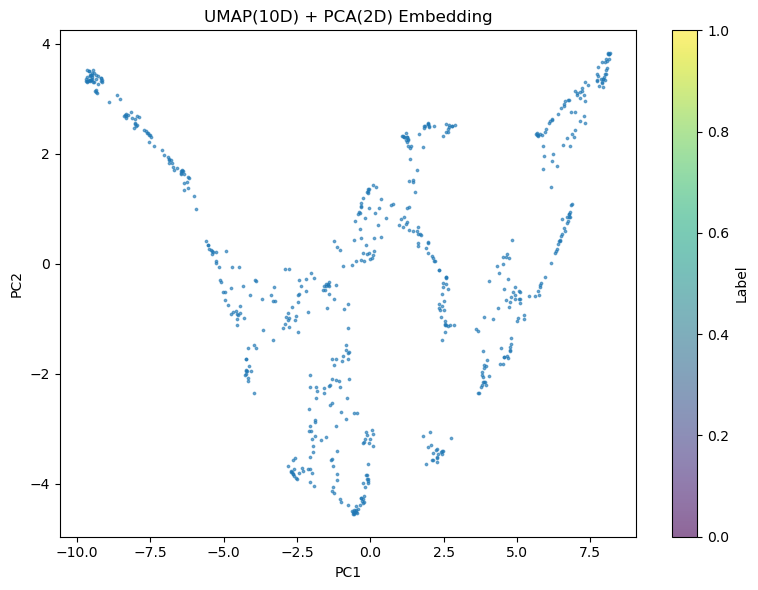

In [10]:
company_agg_train = (
    df_train.filter(pl.col("selected")==1)
    .group_by("companyID")
    .mean()
)
X_umap_train = company_agg_train.drop(["companyID", "selected", "ranker_id"]).to_numpy()
import umap

umap_model = umap.UMAP(n_components = 10, random_state=42)
X_umap_train_embedded = umap_model.fit_transform(X_umap_train)
# import joblib

# # 儲存
# joblib.dump(umap_model, "umap_model__mean_selected.joblib")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 再降到2維
pca = PCA(n_components=2, random_state=42)
X_pca_2d = pca.fit_transform(X_umap_train_embedded)

# 畫散點圖
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca_2d[:,0],
    X_pca_2d[:,1],
    cmap='Spectral',
    s=3,
    alpha=0.6
)
plt.title("UMAP(10D) + PCA(2D) Embedding")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Label")
plt.tight_layout()
plt.show()



# ranker_id

In [3]:
ranker_agg_train = (
    df_train.filter(pl.col("selected")==1)
    .group_by("ranker_id")
    .mean()
)
X_umap_train = ranker_agg_train.drop(["companyID", "selected", "ranker_id"]).to_numpy()
X_umap_train.shape

(84431, 199)

In [4]:
import umap

umap_model = umap.UMAP(n_components = 10, random_state=42)
X_umap_train_embedded = umap_model.fit_transform(X_umap_train)


/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:

# PCA 再降到2維
pca = PCA(n_components=2, random_state=42)
X_pca_2d = pca.fit_transform(X_umap_train_embedded)

# 畫散點圖
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca_2d[:,0],
    X_pca_2d[:,1],
    cmap='Spectral',
    s=3,
    alpha=0.6
)
plt.title("UMAP(10D) + PCA(2D) Embedding")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Label")
plt.tight_layout()
plt.show()



# train + test

✅ Train欄位數: 202
✅ Test欄位數: 201
✅ 共有欄位: ['total_num_transfers_rank', 'legs0_segments0_flightNumber', 'price_per_duration_rank', 'price_percentile', 'price_from_median_zscore', 'price_per_duration', 'legs0_segments0_baggageAllowance_quantity', 'price_minus_fee_rank', 'legs0_arrivalAt_hour', 'pricingInfo_isAccessTP', 'legs0_departureAt_hour', 'both_legs_carrier_all_same', 'total_weighted_mean_cabin', 'price_per_fee_rank', 'totalPrice_rank', 'days_before_departure', 'legs0_segments0_seatsAvailable', 'price_per_fee', 'price_per_tax', 'legs1_main_carrier', 'isVip', 'leg0_view_diff_mean', 'legs1_departureAt_hour', 'baggage_total', 'duration_ratio', 'total_fees', 'all_view_diff_mean', 'legs1_arrivalAt_hour', 'log_price', 'legs1_segments0_flightNumber', 'legs1_weighted_mean_cabin', 'companyID_loo_mean_legs0_departureAt_hour', 'legs0_segments0_cabinClass', 'price_minus_fee', 'legs0_main_carrier', 'companyID_loo_mean_legs0_arrivalAt_hour', 'baggage_total_rank', 'legs0_max_duration_cabin', 'legs0_

/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_64182/1340497582.py:50: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  if df.schema[c] in pl.NUMERIC_DTYPES


✅ 合併後 shape: (500000, 202)
✅ UMAP輸入 shape: (500000, 199)


/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


✅ UMAP模型已儲存


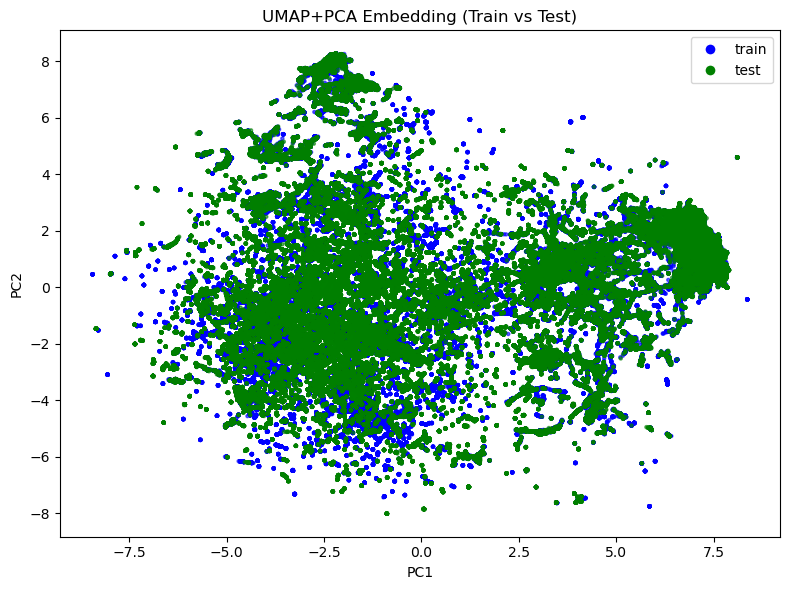

In [3]:
import polars as pl
import pandas as pd
import numpy as np
import umap
import joblib

# 讀取 parquet
train_filled = pl.read_parquet("data/train_filled_v1_with_all.parquet")
test_filled = pl.read_parquet("data/test_filled_v1_with_all.parquet")

# 讀取 top features
df = pd.read_csv("model_output/all_features_xgb/v1_add_all/v1_model/model_importance/common_features_with_ranks.csv")
filtered_features = df[df["min_rank_overall"] != 9999]["feature"].tolist()

# 需要保留的欄位
cols_to_keep = filtered_features + ["selected", "ranker_id", "companyID"]

# 篩選
train_filled = train_filled.select(cols_to_keep)
test_filled = test_filled.select([c for c in cols_to_keep if c in test_filled.columns])

print(f"✅ Train欄位數: {len(train_filled.columns)}")
print(f"✅ Test欄位數: {len(test_filled.columns)}")

# 隨機抽樣
train_sample = train_filled.sample(n=5000000, seed=42)
del train_filled
import gc
gc.collect()
test_sample = test_filled.sample(n=3000000, seed=42)
del test_filled
gc.collect()
# 加來源標籤
train_sample = train_sample.with_columns(pl.lit("train").alias("source"))
test_sample = test_sample.with_columns(pl.lit("test").alias("source"))

# 確認共同欄位
common_cols = [c for c in train_sample.columns if c in test_sample.columns]
print(f"✅ 共有欄位: {common_cols}")

# 統一型別：先只保留共同欄位
train_sample = train_sample.select(common_cols)
test_sample = test_sample.select(common_cols)

# 把 numeric欄轉Float32，其餘都轉Utf8
# 統一型別：改這裡
def unify_dtypes(df):
    # df.schema: dict {col: dtype}
    return df.with_columns([
        (
            pl.col(c).cast(pl.Float32)
            if df.schema[c] in pl.NUMERIC_DTYPES
            else pl.col(c).cast(pl.Utf8)
        )
        for c in df.columns
    ])

train_sample = unify_dtypes(train_sample)
test_sample = unify_dtypes(test_sample)

# 再concat
sample_all = pl.concat([train_sample, test_sample])

print(f"✅ 合併後 shape: {sample_all.shape}")

# 去掉id欄
X_numeric = (
    sample_all
    .drop([c for c in ["companyID", "selected", "ranker_id", "source"] if c in sample_all.columns])
    .to_numpy()
)

source_labels = sample_all["source"].to_list()
print(f"✅ UMAP輸入 shape: {X_numeric.shape}")

# Fit UMAP
umap_model = umap.UMAP(n_components=10, random_state=42)
X_umap_embedded = umap_model.fit_transform(X_numeric)

# 儲存
joblib.dump(umap_model, "umap_model_rowlevel_train_test.joblib")
print("✅ UMAP模型已儲存")

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca_2d = pca.fit_transform(X_umap_embedded)

# 畫散點
import matplotlib.pyplot as plt
source_to_color = {"train": "blue", "test": "green"}
colors = [source_to_color[s] for s in source_labels]

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca_2d[:,0],
    X_pca_2d[:,1],
    c=colors,
    s=5,
    alpha=0.6
)
plt.title("UMAP+PCA Embedding (Train vs Test)")
plt.xlabel("PC1")
plt.ylabel("PC2")
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=clr, markersize=8)
           for clr in source_to_color.values()]
plt.legend(handles, source_to_color.keys())
plt.tight_layout()
plt.show()


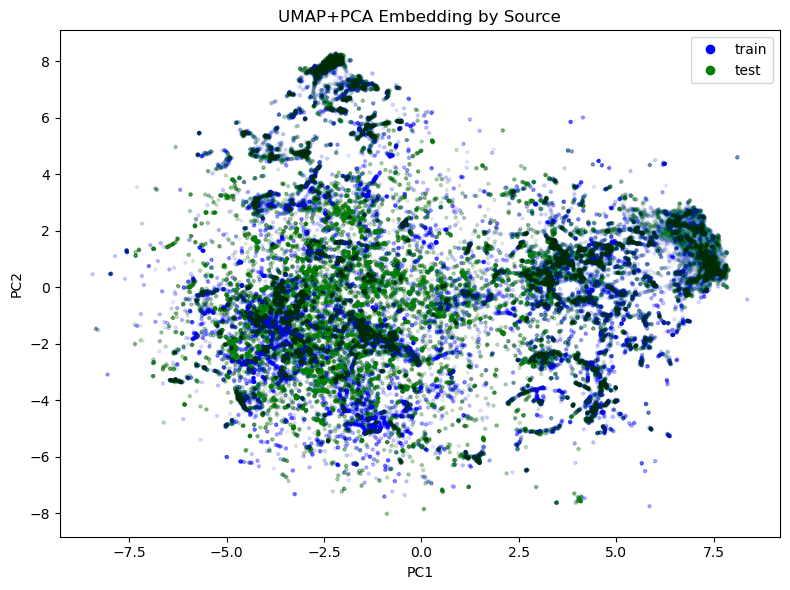

In [4]:

# 畫散點
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca_2d[:,0],
    X_pca_2d[:,1],
    c=colors,
    s=5,
    alpha=0.01
)
plt.title("UMAP+PCA Embedding by Source")
plt.xlabel("PC1")
plt.ylabel("PC2")
# 做 legend
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=clr, markersize=8)
           for clr in source_to_color.values()]
plt.legend(handles, source_to_color.keys())
plt.tight_layout()
plt.show()


# apply

In [1]:
import polars as pl
import pandas as pd
import joblib
import numpy as np

# 讀取 parquet
train_filled = pl.read_parquet("data/test_filled_v1_with_all.parquet")

# 讀取 top features
df = pd.read_csv("model_output/all_features_xgb/v1_add_all/v1_model/model_importance/common_features_with_ranks.csv")
filtered_features = df[df["min_rank_overall"] != 9999]["feature"].tolist()
cols_to_keep = filtered_features + ["Id"]

# 篩選
train_filled = train_filled.select(cols_to_keep)

print(f"✅ DataFrame 現在只有 {len(train_filled.columns)} 欄位: {train_filled.columns}")

# 分開 Id
id_series = train_filled["Id"]

# 去掉Id
X_np = train_filled.drop("Id").to_numpy()

# 釋放Polars
del train_filled, df
import gc
gc.collect()

# 讀取UMAP模型
umap_model = joblib.load("umap_model_rowlevel_train_test.joblib")
print("✅ 已讀取UMAP模型")

# 批次處理
batch_size = 1000000
n_samples = X_np.shape[0]
batches = []

for start in range(0, n_samples, batch_size):
    end = min(start + batch_size, n_samples)
    print(f"🔹 Transforming batch: {start} - {end}")
    
    batch_emb = umap_model.transform(X_np[start:end])
    batches.append(batch_emb)
    gc.collect()

# 拼接
X_umap = np.vstack(batches)
print(f"✅ 完成所有批次，shape={X_umap.shape}")

# 回存DataFrame
umap_cols = [f"umap_{i}" for i in range(X_umap.shape[1])]
df_umap = pl.DataFrame(X_umap, schema=umap_cols)

# 拼回 Id
df_result = pl.concat([id_series.to_frame(), df_umap], how="horizontal")

print("✅ 完成UMAP降維 + Id合併")
print(df_result.head())

# 範例: 儲存
df_result.write_parquet("data/extra_features/test/13_umap_features.parquet")


✅ DataFrame 現在只有 200 欄位: ['total_num_transfers_rank', 'legs0_segments0_flightNumber', 'price_per_duration_rank', 'price_percentile', 'price_from_median_zscore', 'price_per_duration', 'legs0_segments0_baggageAllowance_quantity', 'price_minus_fee_rank', 'legs0_arrivalAt_hour', 'pricingInfo_isAccessTP', 'legs0_departureAt_hour', 'both_legs_carrier_all_same', 'total_weighted_mean_cabin', 'price_per_fee_rank', 'totalPrice_rank', 'days_before_departure', 'legs0_segments0_seatsAvailable', 'price_per_fee', 'price_per_tax', 'legs1_main_carrier', 'isVip', 'leg0_view_diff_mean', 'legs1_departureAt_hour', 'baggage_total', 'duration_ratio', 'total_fees', 'all_view_diff_mean', 'legs1_arrivalAt_hour', 'log_price', 'legs1_segments0_flightNumber', 'legs1_weighted_mean_cabin', 'companyID_loo_mean_legs0_departureAt_hour', 'legs0_segments0_cabinClass', 'price_minus_fee', 'legs0_main_carrier', 'companyID_loo_mean_legs0_arrivalAt_hour', 'baggage_total_rank', 'legs0_max_duration_cabin', 'legs0_segments0_key_

/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ 已讀取UMAP模型
🔹 Transforming batch: 0 - 1000000
🔹 Transforming batch: 1000000 - 2000000
🔹 Transforming batch: 2000000 - 3000000
🔹 Transforming batch: 3000000 - 4000000
🔹 Transforming batch: 4000000 - 5000000
🔹 Transforming batch: 5000000 - 6000000
🔹 Transforming batch: 6000000 - 6897776
✅ 完成所有批次，shape=(6897776, 10)
✅ 完成UMAP降維 + Id合併
shape: (5, 11)
┌──────────┬───────────┬──────────┬──────────┬───┬──────────┬───────────┬──────────┬──────────┐
│ Id       ┆ umap_0    ┆ umap_1   ┆ umap_2   ┆ … ┆ umap_6   ┆ umap_7    ┆ umap_8   ┆ umap_9   │
│ ---      ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ---      ┆ ---       ┆ ---      ┆ ---      │
│ i64      ┆ f32       ┆ f32      ┆ f32      ┆   ┆ f32      ┆ f32       ┆ f32      ┆ f32      │
╞══════════╪═══════════╪══════════╪══════════╪═══╪══════════╪═══════════╪══════════╪══════════╡
│ 18144679 ┆ -1.540461 ┆ 7.233394 ┆ 8.329302 ┆ … ┆ 5.699313 ┆ 3.704905  ┆ 4.202031 ┆ 4.493614 │
│ 18144680 ┆ -1.535158 ┆ 7.225187 ┆ 8.331519 ┆ … ┆ 5.69838  ┆ 3.702111  ┆ 4.

In [1]:
import polars as pl
import pandas as pd
import joblib
import numpy as np

# 讀取 parquet
train_filled = pl.read_parquet("data/train_filled_v1_with_all.parquet")

# 讀取 top features
df = pd.read_csv("model_output/all_features_xgb/v1_add_all/v1_model/model_importance/common_features_with_ranks.csv")
filtered_features = df[df["min_rank_overall"] != 9999]["feature"].tolist()
cols_to_keep = filtered_features + ["Id"]

# 篩選
train_filled = train_filled.select(cols_to_keep)

print(f"✅ DataFrame 現在只有 {len(train_filled.columns)} 欄位: {train_filled.columns}")

# 分開 Id
id_series = train_filled["Id"]

# 去掉Id
X_np = train_filled.drop("Id").to_numpy()

# 釋放Polars
del train_filled, df
import gc
gc.collect()

# 讀取UMAP模型
umap_model = joblib.load("umap_model_rowlevel_train_test.joblib")
print("✅ 已讀取UMAP模型")

# 批次處理
batch_size = 1000000
n_samples = X_np.shape[0]
batches = []

for start in range(0, n_samples, batch_size):
    end = min(start + batch_size, n_samples)
    print(f"🔹 Transforming batch: {start} - {end}")
    
    batch_emb = umap_model.transform(X_np[start:end])
    batches.append(batch_emb)
    gc.collect()

# 拼接
X_umap = np.vstack(batches)
print(f"✅ 完成所有批次，shape={X_umap.shape}")

# 回存DataFrame
umap_cols = [f"umap_{i}" for i in range(X_umap.shape[1])]
df_umap = pl.DataFrame(X_umap, schema=umap_cols)

# 拼回 Id
df_result = pl.concat([id_series.to_frame(), df_umap], how="horizontal")

print("✅ 完成UMAP降維 + Id合併")
print(df_result.head())

# 範例: 儲存
df_result.write_parquet("data/extra_features/train/13_umap_features.parquet")


✅ DataFrame 現在只有 200 欄位: ['total_num_transfers_rank', 'legs0_segments0_flightNumber', 'price_per_duration_rank', 'price_percentile', 'price_from_median_zscore', 'price_per_duration', 'legs0_segments0_baggageAllowance_quantity', 'price_minus_fee_rank', 'legs0_arrivalAt_hour', 'pricingInfo_isAccessTP', 'legs0_departureAt_hour', 'both_legs_carrier_all_same', 'total_weighted_mean_cabin', 'price_per_fee_rank', 'totalPrice_rank', 'days_before_departure', 'legs0_segments0_seatsAvailable', 'price_per_fee', 'price_per_tax', 'legs1_main_carrier', 'isVip', 'leg0_view_diff_mean', 'legs1_departureAt_hour', 'baggage_total', 'duration_ratio', 'total_fees', 'all_view_diff_mean', 'legs1_arrivalAt_hour', 'log_price', 'legs1_segments0_flightNumber', 'legs1_weighted_mean_cabin', 'companyID_loo_mean_legs0_departureAt_hour', 'legs0_segments0_cabinClass', 'price_minus_fee', 'legs0_main_carrier', 'companyID_loo_mean_legs0_arrivalAt_hour', 'baggage_total_rank', 'legs0_max_duration_cabin', 'legs0_segments0_key_

/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ 已讀取UMAP模型
🔹 Transforming batch: 0 - 1000000
🔹 Transforming batch: 1000000 - 2000000
🔹 Transforming batch: 2000000 - 3000000
🔹 Transforming batch: 3000000 - 4000000
🔹 Transforming batch: 4000000 - 5000000
🔹 Transforming batch: 5000000 - 6000000
🔹 Transforming batch: 6000000 - 7000000
🔹 Transforming batch: 7000000 - 8000000
🔹 Transforming batch: 8000000 - 9000000
🔹 Transforming batch: 9000000 - 10000000
🔹 Transforming batch: 10000000 - 11000000
🔹 Transforming batch: 11000000 - 12000000
🔹 Transforming batch: 12000000 - 13000000
🔹 Transforming batch: 13000000 - 14000000
🔹 Transforming batch: 14000000 - 15000000
🔹 Transforming batch: 15000000 - 16000000
🔹 Transforming batch: 16000000 - 17000000
🔹 Transforming batch: 17000000 - 18000000
🔹 Transforming batch: 18000000 - 18145372
✅ 完成所有批次，shape=(18145372, 10)
✅ 完成UMAP降維 + Id合併
shape: (5, 11)
┌─────┬──────────┬──────────┬──────────┬───┬──────────┬──────────┬──────────┬──────────┐
│ Id  ┆ umap_0   ┆ umap_1   ┆ umap_2   ┆ … ┆ umap_6   ┆ umap_7 

In [2]:
import polars as pl
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 讀取 parquet
train_df = pl.read_parquet("data/extra_features/train/13_umap_features.parquet")
test_df = pl.read_parquet("data/extra_features/test/13_umap_features.parquet")

print("✅ 已讀取train/test資料")

# 把Id分開
train_ids = train_df["Id"].to_numpy()
test_ids = test_df["Id"].to_numpy()

# 去掉Id
X_train = train_df.drop("Id").to_numpy()
X_test = test_df.drop("Id").to_numpy()

# 合併
X_all = np.vstack([X_train, X_test])
y_all = np.concatenate([
    np.zeros(len(X_train)),  # Train標0
    np.ones(len(X_test))     # Test標1
])

print(f"✅ 合併完成, shape={X_all.shape}")

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca_2d = pca.fit_transform(X_all)

# 畫圖
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca_2d[:,0],
    X_pca_2d[:,1],
    c=y_all,
    cmap="coolwarm",
    s=5,
    alpha=0.6
)
plt.title("UMAP Embedding + PCA (Train vs Test)")
plt.xlabel("PC1")
plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=[0,1])
cbar.set_label("Dataset")
cbar.set_ticklabels(["Train", "Test"])
plt.tight_layout()
plt.show()


✅ 已讀取train/test資料


KeyboardInterrupt: 

In [2]:
import numpy as np
import polars as pl

# 排除列
exclude_cols = ['Id', 'ranker_id', 'selected']
feature_cols = [col for col in train_filled.columns if col not in exclude_cols]
print(f"Using {len(feature_cols)} features")

# 我們先把全部需要的欄位一次select
df_all = train_filled.select(['ranker_id'] + ['selected'] + feature_cols)

# ranker_id去重
unique_rankers = df_all.select("ranker_id").unique().to_series().to_list()

# 打亂
np.random.seed(42)
np.random.shuffle(unique_rankers)

# 切8:2
n_train = int(0.8 * len(unique_rankers))
train_rankers = set(unique_rankers[:n_train])

# 標記is_train
df_all = df_all.with_columns(
    pl.col("ranker_id").is_in(train_rankers).alias("is_train")
)

# 分割
df_train = df_all.filter(pl.col("is_train"))
df_val = df_all.filter(~pl.col("is_train"))

# 切X/y
X_train_np = df_train.select(feature_cols).to_numpy()
y_train_np = df_train["selected"].to_numpy()
X_val_np = df_val.select(feature_cols).to_numpy()
y_val_np = df_val["selected"].to_numpy()

print("✅ 完成資料切分")
print("Train size:", X_train_np.shape, " Val size:", X_val_np.shape)


Using 20 features
✅ 完成資料切分
Train size: (14445656, 20)  Val size: (3699716, 20)


In [ ]:

train_new, transform_dict = build_company_loo_features(train_filled,
                                                       output_dir= "data/extra_features/train")


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_96862/3811100871.py:101: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("selected_count")
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_96862/3811100871.py:111: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("selected_count")
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_96862/3811100871.py:157: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("count")
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_96862/3811100871.py:162: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("total_occurrences"))


✅ 已儲存 transform_dict: data/extra_features/train/12_companyID_features.parquet
✅ 已儲存 transform_dict: data/extra_features/train/transform_dict_companyID.pkl


In [3]:
from lightgbm import early_stopping, log_evaluation, LGBMClassifier

clf = LGBMClassifier(
    objective="binary",
    class_weight="balanced",
    learning_rate=0.05,
    num_leaves=128,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=10.0,
    random_state=42,
    n_estimators=500,
    n_jobs=-1
)

clf.fit(
    X_train_np,
    y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_metric=["binary_logloss", "auc"],
    callbacks=[
        early_stopping(stopping_rounds=50, verbose=True),
        log_evaluation(20)
    ],
    feature_name=feature_cols  # ✅ 在這裡明確告訴LightGBM特徵名稱
)



# 預測機率
y_val_pred_proba = clf.predict_proba(X_val_np)[:,1]
print("前10筆機率:", y_val_pred_proba[:10])

from sklearn.metrics import classification_report, confusion_matrix

y_val_pred_label = clf.predict(X_val_np)

print(classification_report(y_val_np, y_val_pred_label))
print(confusion_matrix(y_val_np, y_val_pred_label))




[LightGBM] [Info] Number of positive: 84431, number of negative: 14361225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.613907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2743
[LightGBM] [Info] Number of data points in the train set: 14445656, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 50 rounds
[20]	valid_0's binary_logloss: 0.432191	valid_0's auc: 0.928876
[40]	valid_0's binary_logloss: 0.363672	valid_0's auc: 0.933497
[60]	valid_0's binary_logloss: 0.338657	valid_0's auc: 0.936904
[80]	valid_0's binary_logloss: 0.326686	valid_0's auc: 0.939173
[100]	valid_0's binary_logloss: 0.317938	valid_0's auc: 0.941363
[120]	valid_0's binary_logloss: 0.311034	valid_0's auc: 

/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


前10筆機率: [0.99140091 0.64615252 0.43772315 0.01080807 0.00822298 0.63890176
 0.44234942 0.00563728 0.00481942 0.60222049]


/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.88      0.93   3678608
           1       0.04      0.88      0.08     21108

    accuracy                           0.88   3699716
   macro avg       0.52      0.88      0.51   3699716
weighted avg       0.99      0.88      0.93   3699716

[[3229070  449538]
 [   2508   18600]]


In [4]:

import os 
# 📌 儲存模型
model_path = os.path.join(save_dir, f"top{n_top}")
os.makedirs(model_path, exist_ok=True)
model_file = os.path.join(model_path, "lgb_classifer_model.txt")

clf.booster_.save_model(model_file)
print(f"✅ 已儲存模型到 'lgb_classifer_model.txt' in {model_file}")


✅ 已儲存模型到 'lgb_classifer_model.txt' in model_output/selected_features_xgb/one_model/top20/lgb_classifer_model.txt


In [5]:
import polars as pl

def compute_topk_hit_rate(df_topk: pl.DataFrame, df_ground_truth: pl.DataFrame, K: int) -> float:
    """
    計算 Top-K 命中率（HitRate@K）
    """
    # 僅保留 Ground Truth 的正例
    df_pos = df_ground_truth.filter(pl.col("selected") == 1).select(["ranker_id"])
    
    # 將每個ranker_id的Top-K取出
    df_topk_k = df_topk.filter(pl.col("rank_in_group") <= K).select(["ranker_id"]).unique()

    # inner join: 有命中的正例
    df_hit = df_pos.join(df_topk_k, on="ranker_id", how="inner")

    num_hit = df_hit.height
    num_total = df_pos.height

    hit_rate = num_hit / num_total if num_total > 0 else 0.0
    
    num_positive = df_ground_truth.filter(pl.col("selected") == 0).height
    print(f"✅ df_val 中 selected=0 的數量: {num_positive}")

    print(f"✅ HitRate@{K}: {hit_rate:.4f} ({num_hit}/{num_total})")
    return hit_rate
# 預測機率
y_val_pred_proba = clf.predict_proba(X_val_np)[:,1]

# 建df_pred
df_pred = df_val.select(["ranker_id"]).with_columns(
    pl.Series("score", y_val_pred_proba)
)

# 排序 rank_in_group
df_pred = df_pred.with_columns(
    pl.col("score").rank("ordinal", descending=True).over("ranker_id").alias("rank_in_group")
)

# 計算Top-K命中率
hit_rate = compute_topk_hit_rate(
    df_topk=df_pred,
    df_ground_truth=df_val,
    K=50
)



/opt/anaconda3/envs/FlightRank/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ df_val 中 selected=0 的數量: 3678608
✅ HitRate@50: 1.0000 (21108/21108)


In [ ]:
num_positive = df_val.filter(pl.col("selected") == 0).height
print(f"✅ df_val 中 selected=0 的數量: {num_positive}")


✅ df_val 中 selected=1 的數量: 3598742


In [12]:
df_pred

shape: (3_619_850, 3)
┌─────────────────────────────────┬──────────┬───────────────┐
│ ranker_id                       ┆ score    ┆ rank_in_group │
│ ---                             ┆ ---      ┆ ---           │
│ str                             ┆ f64      ┆ u32           │
╞═════════════════════════════════╪══════════╪═══════════════╡
│ 98ce0dabf6964640b63079fbafd42c… ┆ 0.994294 ┆ 1             │
│ 98ce0dabf6964640b63079fbafd42c… ┆ 0.679394 ┆ 2             │
│ 98ce0dabf6964640b63079fbafd42c… ┆ 0.526543 ┆ 6             │
│ 98ce0dabf6964640b63079fbafd42c… ┆ 0.004755 ┆ 16            │
│ 98ce0dabf6964640b63079fbafd42c… ┆ 0.006912 ┆ 14            │
│ …                               ┆ …        ┆ …             │
│ be21a1ace59f41729922828a72c9e3… ┆ 0.016521 ┆ 45            │
│ be21a1ace59f41729922828a72c9e3… ┆ 0.000974 ┆ 58            │
│ be21a1ace59f41729922828a72c9e3… ┆ 0.015265 ┆ 47            │
│ be21a1ace59f41729922828a72c9e3… ┆ 0.00105  ┆ 57            │
│ be21a1ace59f41729922828a72c9e3… ┆ 0.00172  ┆ 55            │
└─────────────────────────────────┴──────────┴───────────────┘

In [ ]:
# 計算Top-K命中率
hit_rate = compute_topk_hit_rate(
    df_topk=df_pred,
    df_ground_truth=df_val,
    K=
)

✅ df_val 中 selected=0 的數量: 3678608
✅ HitRate@1: 1.0000 (21108/21108)


# Prediction

In [ ]:
import os
import numpy as np
import polars as pl
from lightgbm import Booster

# 參數
model_path = "model_output/selected_features_xgb/one_model/top20/lgb_classifer_model.txt"
parquet_path = "data/test_filled.parquet"

# 讀取模型 (用Booster)
booster = Booster(model_file=model_path)

# 確認 feature_names
model_features = booster.feature_name()
if model_features is None:
    raise ValueError("❌ 模型沒有 feature_names，請確認訓練時有指定 feature_names")
print(f"✅ 模型共 {len(model_features)} 個features")

# 讀取 test_filled
df = pl.read_parquet(parquet_path)
print(f"✅ 讀取 test_filled，共 {df.height} rows")

# 檢查缺失
missing_in_data = [f for f in model_features if f not in df.columns]
if missing_in_data:
    raise ValueError(f"❌ 下列特徵在 test_filled 不存在: {missing_in_data}")

# 篩選
df_for_predict = df.select(model_features)
X_np = df_for_predict.to_numpy()

# 預測 (Booster.predict 直接回傳概率)
preds = booster.predict(X_np)
print(f"✅ 預測完成，共 {len(preds)} 筆")

# 回存結果
df_result = (
    df
    .with_columns([
        pl.Series("selected", preds)
    ])
)


✅ 模型共 20 個features


✅ 讀取 test_filled，共 6897776 rows
✅ 預測完成，共 6897776 筆


In [11]:
import os
import polars as pl

def export_submission_parquets(
    test_filled_with_preds: pl.DataFrame,
    output_dir: str,
    raw_filename: str = "raw_submission.parquet",
    ranked_filename: str = "rank_submission.parquet"
):
    """
    根據 test_filled_with_preds 輸出兩個 parquet:
    1. 原始分數 (selected)
    2. rank 排序 (selected)
    """
    # 檢查目錄
    os.makedirs(output_dir, exist_ok=True)

    # Subset + __index_level_0__
    subset_df = (
        test_filled_with_preds
        .select(["Id", "ranker_id", "selected"])
        .with_columns(
            pl.col("Id").alias("__index_level_0__")
        )
        .with_columns([
            pl.col("Id").cast(pl.Int64),
            pl.col("ranker_id").cast(pl.Utf8),
            pl.col("selected").cast(pl.Float64),
            pl.col("__index_level_0__").cast(pl.Int64)
        ])
    )

    # 儲存原始 parquet
    raw_path = os.path.join(output_dir, raw_filename)
    subset_df.write_parquet(raw_path)
    print(f"✅ 已儲存原始 submission: {raw_path}")
    print(subset_df)

    # Rank 排名
    ranked_df = subset_df.with_columns(
        pl.col("selected")
          .rank(method="ordinal", descending=True)
          .over("ranker_id")
          .alias("selected")
    )

    # 儲存排名 parquet
    ranked_path = os.path.join(output_dir, ranked_filename)
    ranked_df.write_parquet(ranked_path)
    print(f"✅ 已儲存rank submission: {ranked_path}")
    print(ranked_df)
    
n_top = 20
export_submission_parquets(
    test_filled_with_preds=df_result,   # 你的帶有 selected 分數的 DataFrame
    output_dir=f"model_output/selected_features_xgb/one_model/top{n_top}",
    ranked_filename = "lgb_classifer_rank_submission.parquet",
    raw_filename ="lgb_classifer_raw_submission.parquet",
)


✅ 已儲存原始 submission: model_output/selected_features_xgb/one_model/top20/lgb_classifer_raw_submission.parquet
shape: (6_897_776, 4)
┌──────────┬─────────────────────────────────┬──────────┬───────────────────┐
│ Id       ┆ ranker_id                       ┆ selected ┆ __index_level_0__ │
│ ---      ┆ ---                             ┆ ---      ┆ ---               │
│ i64      ┆ str                             ┆ f64      ┆ i64               │
╞══════════╪═════════════════════════════════╪══════════╪═══════════════════╡
│ 18144679 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 0.327041 ┆ 18144679          │
│ 18144680 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 0.664309 ┆ 18144680          │
│ 18144681 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 0.120555 ┆ 18144681          │
│ 18144682 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 0.449987 ┆ 18144682          │
│ 18144683 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 0.309593 ┆ 18144683          │
│ …        ┆ …                               ┆ …        ┆ …                 │
│ 25043143 ┆

In [ ]:
from scripts.result_esemble import compute_ranked_average_selected_from_submissions

submission_paths = [
    "model_output/selected_features_xgb/one_model/top60/raw_submission.parquet",
    "model_output/all_features_xgb/2_raw_submission.parquet",
    "model_output/all_features_xgb/raw_submission.parquet",
    "model_output/selected_features_xgb/one_model/top20/raw_submission.parquet"
]

avg_df = compute_ranked_average_selected_from_submissions(submission_paths)

# 顯示前5筆
print(avg_df.head())

# 如需輸出
avg_df.write_parquet("submission_selected_mean.parquet")
print("✅ 已輸出平均submission")


✅ 讀取: model_output/selected_features_xgb/one_model/top60/raw_submission.parquet
✅ 讀取: model_output/all_features_xgb/2_raw_submission.parquet
✅ 讀取: model_output/all_features_xgb/raw_submission.parquet
✅ 讀取: model_output/selected_features_xgb/one_model/top20/raw_submission.parquet
✅ 完成 6897776 筆平均+排名計算
shape: (5, 4)
┌──────────┬─────────────────────────────────┬──────────┬───────────────────┐
│ Id       ┆ ranker_id                       ┆ selected ┆ __index_level_0__ │
│ ---      ┆ ---                             ┆ ---      ┆ ---               │
│ i64      ┆ str                             ┆ u32      ┆ i64               │
╞══════════╪═════════════════════════════════╪══════════╪═══════════════════╡
│ 18144679 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 98       ┆ 18144679          │
│ 18144680 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 32       ┆ 18144680          │
│ 18144681 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 223      ┆ 18144681          │
│ 18144682 ┆ c9373e5f772e43d593dd6ad2fa90f6… ┆ 122      ┆ 18